
<pre>
<b>Contents</b>
1. Using a Tagger
2. Tagged Corpora
    Representing Tagged Tokens
    Reading Tagged Corpora
    A Universal Part-of-Speech Tagset
    Nouns
    Verbs
    Adjectives and Adverbs
    Unsimplified Tags
    Exploring Tagged Corpora
3. Mapping Words to Properties Using Python Dictionaries
    Indexing Lists vs Dictionaries
    Dictionaries in Python
    Defining Dictionaries
    Default Dictionaries
    Incrementally Updating a Dictionary
    Complex Keys and Values
    Inverting a Dictionary
4. Automatic Tagging
    The Default Tagger
    The Regular Expression Tagger
    The Lookup Tagger
    Evaluation
5. N-Gram Tagging
    Unigram Tagging
    Separating the Training and Testing Data
    General N-Gram Tagging
    Combining Taggers
    Tagging Unknown Words
    Storing Taggers
    Performance Limitations
6. Transformation-Based Tagging
7. How to Determine the Category of a Word
    Morphological Clues
    Syntactic Clues
    Semantic Clues
    New Words
    Morphology in Part of Speech Tagsets
        </pre>

## Using a Tagger

In [1]:
import nltk

In [7]:
tokens1 = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(tokens1)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [8]:
tokens2 = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(tokens2)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [9]:
brown_w = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [10]:
brown_w.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


## Tagged Corpora

### Representing Tagged Tokens


In [11]:
tagged_token = nltk.tag.str2tuple('fly/VB')
tagged_token

('fly', 'VB')

In [12]:
sent = '''
... The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
... other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
... Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
... said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
... accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
... interest/NN of/IN both/ABX governments/NNS ''/'' ./.
... '''

In [13]:
sent

"\nThe/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN\nother/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC\nFulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS\nsaid/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB\naccepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT\ninterest/NN of/IN both/ABX governments/NNS ''/'' ./.\n"

In [15]:
[nltk.tag.str2tuple(w) for w in nltk.word_tokenize(sent)][:5]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN')]

### Reading Tagged Corpora

In [20]:
 nltk.corpus.brown.tagged_words(tagset='universal')[:5]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN')]

In [21]:
 nltk.corpus.brown.tagged_words()[:5]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [24]:
nltk.corpus.brown.words()[:5]

['The', 'Fulton', 'County', 'Grand', 'Jury']

In [26]:
nltk.corpus.nps_chat.tagged_words(tagset='universal')[:5]

[('now', 'ADV'),
 ('im', 'PRON'),
 ('left', 'VERB'),
 ('with', 'ADP'),
 ('this', 'DET')]

### A Universal Part-of-Speech Tagset

In [29]:
brown_news_tagged = nltk.corpus.brown.tagged_words(categories='news', tagset='universal')
brown_news_tagged[:5]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN')]

In [30]:
freqdist = nltk.FreqDist(t for w,t in brown_news_tagged)
freqdist.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

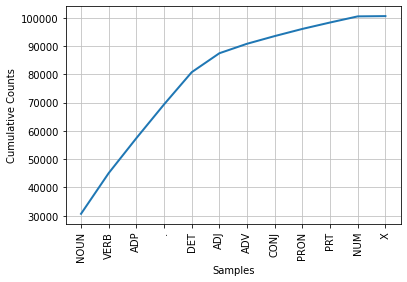

In [34]:
freqdist.plot(cumulative=True);

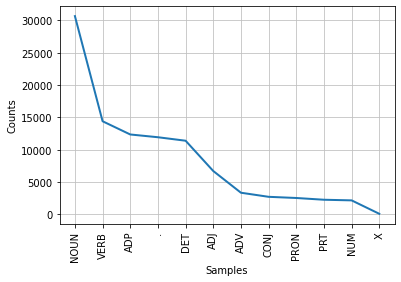

In [35]:
freqdist.plot(cumulative=False);

In [53]:
bigrams = list(nltk.bigrams(brown_news_tagged))
bigrams[:3]

[(('The', 'DET'), ('Fulton', 'NOUN')),
 (('Fulton', 'NOUN'), ('County', 'NOUN')),
 (('County', 'NOUN'), ('Grand', 'ADJ'))]

In [60]:
before_n = nltk.FreqDist(t1[1] for t1,t2 in bigrams if t2[1] == 'NOUN')
before_n.most_common(5)

[('NOUN', 7959), ('DET', 7373), ('ADJ', 4761), ('ADP', 3781), ('.', 2796)]

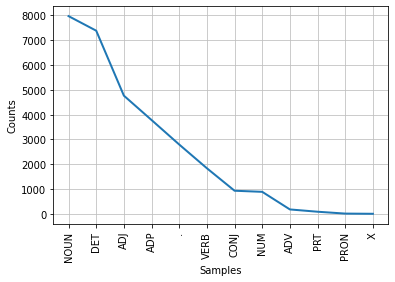

In [62]:
before_n.plot();

In [63]:
# most common verbs
verbs_freqdist = nltk.FreqDist(w[0] for w in brown_news_tagged if w[1] == 'VERB')
verbs_freqdist.most_common(10)

[('is', 732),
 ('was', 717),
 ('be', 526),
 ('said', 402),
 ('will', 388),
 ('are', 328),
 ('has', 300),
 ('had', 279),
 ('have', 265),
 ('were', 252)]

In [68]:
cond_freqdist = nltk.ConditionalFreqDist(brown_news_tagged)
cond_freqdist['fly']

FreqDist({'NOUN': 5, 'VERB': 2})

In [69]:
#reverse now tags are conditions and words are the events
wsj = nltk.corpus.treebank.tagged_words()
rev_cond_freqdist = nltk.ConditionalFreqDist((t,w) for w,t in wsj)

In [72]:
list(rev_cond_freqdist['VBN'])[:6]

['been', 'expected', 'made', 'compared', 'based', 'used']

In [73]:
rev_cond_freqdist.conditions()

['NNP',
 ',',
 'CD',
 'NNS',
 'JJ',
 'MD',
 'VB',
 'DT',
 'NN',
 'IN',
 '.',
 'VBZ',
 'VBG',
 'CC',
 'VBD',
 'VBN',
 '-NONE-',
 'RB',
 'TO',
 'PRP',
 'RBR',
 'WDT',
 'VBP',
 'RP',
 'PRP$',
 'JJS',
 'POS',
 '``',
 'EX',
 "''",
 'WP',
 ':',
 'JJR',
 'WRB',
 '$',
 'NNPS',
 'WP$',
 '-LRB-',
 '-RRB-',
 'PDT',
 'RBS',
 'FW',
 'UH',
 'SYM',
 'LS',
 '#']

In [74]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [75]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [76]:
tagdict

{'NN-TL': [('President', 88),
  ('House', 68),
  ('State', 59),
  ('University', 42),
  ('City', 41)],
 'NN': [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)],
 'NNS': [('years', 101),
  ('members', 69),
  ('people', 52),
  ('sales', 51),
  ('men', 46)],
 'NN-HL': [('sp.', 2),
  ('problem', 2),
  ('Question', 2),
  ('cut', 2),
  ('party', 2)],
 'NN$-TL': [("President's", 11),
  ("Administration's", 3),
  ("Army's", 3),
  ("League's", 3),
  ("University's", 3)],
 'NN$': [("year's", 13),
  ("world's", 8),
  ("state's", 7),
  ("nation's", 6),
  ("city's", 6)],
 'NNS-HL': [('Wards', 1),
  ('deputies', 1),
  ('bonds', 1),
  ('aspects', 1),
  ('Decisions', 1)],
 'NNS-TL': [('States', 38),
  ('Nations', 11),
  ('Masters', 10),
  ('Communists', 9),
  ('Rules', 9)],
 'NNS$': [("children's", 7),
  ("women's", 5),
  ("men's", 3),
  ("janitors'", 3),
  ("taxpayers'", 2)],
 'NNS$-TL': [("Women's", 4),
  ("States'", 3),
  ("Giants'", 2),
  ("Princes'", 1),
  ("Bombers'", 1)],


In [81]:
# want to see how 'often' is used in text, to see the words that follow often
brown_learned_text = nltk.corpus.brown.words(categories='learned')
learned_bigrams = list(nltk.bigrams(brown_learned_text))
learned_bigrams[:4]

[('1', '.'), ('.', 'Introduction'), ('Introduction', 'It'), ('It', 'has')]

In [88]:
sorted(set(w for o,w in learned_bigrams if o=='often'))[:6]

[',', '.', 'accomplished', 'analytically', 'appear', 'apt']

In [90]:
brown_learned_text_tagged = nltk.corpus.brown.tagged_words(categories='learned', tagset='universal')
often_tagged_bigram = list(nltk.bigrams(brown_learned_text_tagged))
often_tagged_bigram[:2]

[(('1', 'NUM'), ('.', '.')), (('.', '.'), ('Introduction', 'NOUN'))]

In [91]:
after_often_freq = nltk.FreqDist(w2[1] for w1,w2 in often_tagged_bigram if w1[0] == 'often')
after_often_freq.most_common()

[('VERB', 37), ('ADV', 8), ('ADP', 7), ('ADJ', 6), ('.', 4), ('PRT', 2)]

In [92]:
after_often_freq.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [95]:
sent_brown = nltk.corpus.brown.tagged_sents(tagset='universal')
sent_brown[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

In [116]:
def process(sentence):
    trigrams = list(nltk.trigrams(sentence))
    for (w1,t1), (w2,t2), (w3,t3) in trigrams:
        if (t1.startswith('V') and t2 == 'TO'): 
            print(w1, w2, w3) 

In [117]:
for tagged_sent in sent_brown:
    process(tagged_sent)

## Mapping Words to Properties Using Python Dictionaries


In [3]:
pos = {}

In [4]:
pos['colorless'] = 'ADJ'
pos['sleep'] = 'V'

In [5]:
pos

{'colorless': 'ADJ', 'sleep': 'V'}

In [6]:
len(pos)

2

In [7]:
list(pos)

['colorless', 'sleep']

In [8]:
[w for w in pos]

['colorless', 'sleep']

In [9]:
pos.keys()

dict_keys(['colorless', 'sleep'])

In [10]:
pos.items()

dict_items([('colorless', 'ADJ'), ('sleep', 'V')])

In [11]:
pos.values()

dict_values(['ADJ', 'V'])

In [16]:
vals = list(pos.values())
vals

['ADJ', 'V']

In [17]:
[v for v in vals]

['ADJ', 'V']

### Default Dictionaries

In [18]:
from collections import defaultdict

In [19]:
d1 = defaultdict(int)

In [20]:
d1['colorless'] = 4

In [21]:
d1['ideas']

0

In [22]:
d2 = defaultdict(lambda: 'VERB')

In [23]:
d2['colorless'] = 9

In [24]:
d2

defaultdict(<function __main__.<lambda>()>, {'colorless': 9})

In [25]:
d2['ideas']

'VERB'

In [26]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
alice

['[', 'Alice', "'", 's', 'Adventures', 'in', ...]

In [28]:
vocab = nltk.FreqDist(alice)
len(vocab)

3016

In [29]:
v1000 = [w for (w,_) in vocab.most_common(1000)]

In [31]:
mapping = defaultdict(lambda: 'UNK')

In [32]:
for w in v1000:
    mapping[w] = w

In [34]:
mapping['oo']

'UNK'

In [36]:
alice2 = [mapping[w] for w in alice]

In [38]:
alice2[:20]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'UNK']

### Incrementally Updating a Dictionary

In [39]:
counts = defaultdict(int)
from nltk.corpus import brown


In [41]:
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag]+=1

In [42]:
counts

defaultdict(int,
            {'DET': 11389,
             'NOUN': 30654,
             'ADJ': 6706,
             'VERB': 14399,
             'ADP': 12355,
             '.': 11928,
             'ADV': 3349,
             'CONJ': 2717,
             'PRT': 2264,
             'PRON': 2535,
             'NUM': 2166,
             'X': 92})

In [44]:
counts2 = nltk.FreqDist(t for (w,t) in brown.tagged_words(categories='news', tagset='universal'))

In [47]:
counts2

FreqDist({'NOUN': 30654, 'VERB': 14399, 'ADP': 12355, '.': 11928, 'DET': 11389, 'ADJ': 6706, 'ADV': 3349, 'CONJ': 2717, 'PRON': 2535, 'PRT': 2264, ...})

In [48]:
last_letters = defaultdict(list)
c_words = nltk.corpus.words.words('en')

In [49]:
let_dict = defaultdict(list)

In [50]:
for w in c_words:
    key_name = w[-2:]
    let_dict[key_name].append(w)

In [52]:
let_dict['al']

['aal',
 'Aaronical',
 'abactinal',
 'abaxial',
 'abbatial',
 'abbatical',
 'abdal',
 'abdominal',
 'abdominogenital',
 'abdominovaginal',
 'abdominovesical',
 'aberrational',
 'abettal',
 'abidal',
 'abiogenetical',
 'abiological',
 'ablatival',
 'ableptical',
 'abnerval',
 'abneural',
 'abnormal',
 'aboral',
 'aboriginal',
 'abortional',
 'abranchial',
 'absinthial',
 'abstinential',
 'abstractional',
 'abterminal',
 'abuttal',
 'abysmal',
 'abyssal',
 'academial',
 'academical',
 'acalycal',
 'acanonical',
 'acanthial',
 'acanthological',
 'acapnial',
 'acaricidal',
 'acategorical',
 'acaudal',
 'accentual',
 'accessional',
 'accessorial',
 'accidental',
 'accidential',
 'accipitral',
 'acclinal',
 'accommodational',
 'accompanimental',
 'accrementitial',
 'accretal',
 'accrual',
 'accultural',
 'accusal',
 'accusatival',
 'accusatorial',
 'acephal',
 'acetal',
 'acetochloral',
 'acetometrical',
 'achenial',
 'Acherontical',
 'achordal',
 'achronical',
 'acidimetrical',
 'Acieral',


In [53]:
anagrams = defaultdict(list)

In [56]:
for w in c_words:
    key = ''.join(sorted(w))
    anagrams[key].append(w)

In [57]:
anagrams

defaultdict(list,
            {'A': ['A'],
             'a': ['a'],
             'aa': ['aa'],
             'aal': ['aal', 'ala'],
             'aaiil': ['aalii'],
             'aam': ['aam', 'ama'],
             'Aain': ['Aani'],
             'aaadkrrv': ['aardvark'],
             'aadflorw': ['aardwolf'],
             'Aanor': ['Aaron'],
             'Aacinor': ['Aaronic'],
             'Aaacilnor': ['Aaronical'],
             'Aaeinort': ['Aaronite'],
             'Aaciinort': ['Aaronitic'],
             'Aaru': ['Aaru'],
             'Ab': ['Ab'],
             'aab': ['aba', 'baa'],
             'Aabbdeh': ['Ababdeh'],
             'Aaabbu': ['Ababua'],
             'aabc': ['abac', 'caba'],
             'aaabc': ['abaca'],
             'aaabcet': ['abacate'],
             'aaabcy': ['abacay'],
             'aaabceint': ['abacinate'],
             'aaabciinnot': ['abacination'],
             'aabccissu': ['abaciscus'],
             'aabcist': ['abacist'],
             'aabck': ['ab

In [58]:
anagrams2 = nltk.Index((''.join(sorted(w)),w) for w in c_words)

In [60]:
anagrams2['acd']

['cad']

In [61]:
pos_hard = defaultdict(lambda: defaultdict(int))

In [62]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [64]:
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos_hard[(t1, w2)][t2] += 1

In [65]:
pos_hard[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

### Inverting a Dictionary

In [66]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})

In [67]:
pos

{'colorless': 'ADJ',
 'sleep': 'V',
 'cats': 'N',
 'scratch': 'V',
 'peacefully': 'ADV',
 'old': 'ADJ'}

In [68]:
inv_dict = defaultdict(list)

In [70]:
for k, v in pos.items():
    inv_dict[v].append(k)

In [71]:
inv_dict

defaultdict(list,
            {'ADJ': ['colorless', 'old'],
             'V': ['sleep', 'scratch'],
             'N': ['cats'],
             'ADV': ['peacefully']})

## Automatic Tagging